In [32]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#load the data

df = pd.read_csv('hearing_test.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [35]:
# Visualize the data

Text(0.5, 1.0, 'Age vs TestResult')

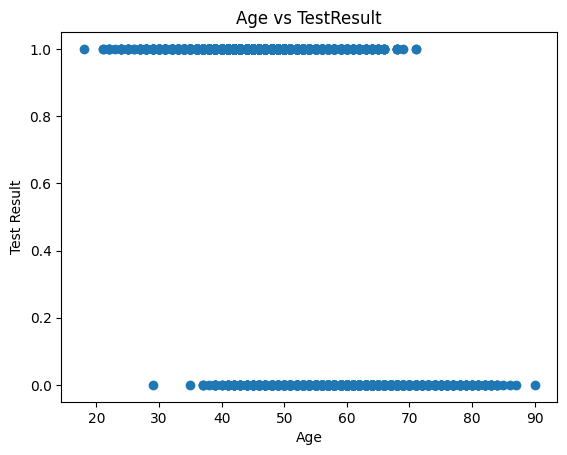

In [36]:
plt.scatter(df['age'],df['test_result'])
plt.xlabel('Age')
plt.ylabel('Test Result')
plt.title("Age vs TestResult")


<AxesSubplot:xlabel='age', ylabel='physical_score'>

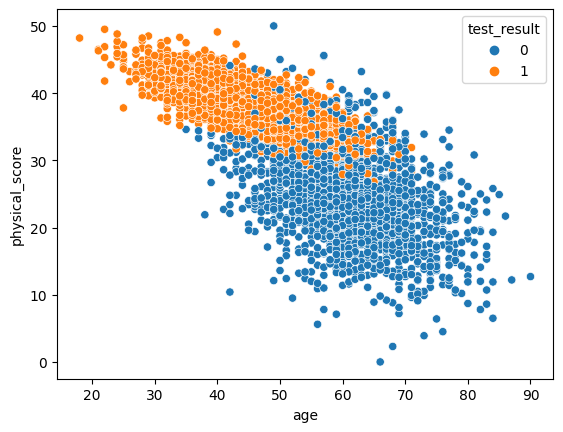

In [37]:
sns.scatterplot(x='age',y='physical_score',data=df,hue = 'test_result')

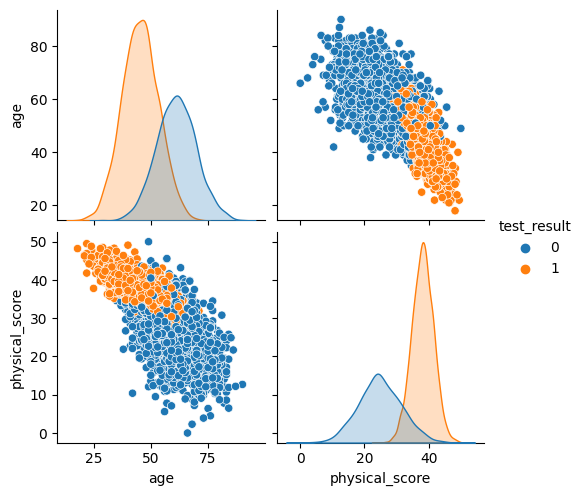

In [38]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:xlabel='test_result', ylabel='count'>

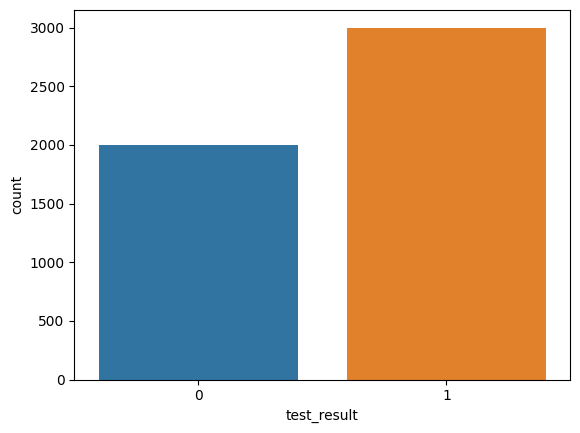

In [39]:
sns.countplot(data=df,x='test_result')

In [40]:
# Find the correlation

for column in df.columns:
    corr = np.corrcoef(df['test_result'],df[column])
    print(f"Correlation between test result and {column} = {corr[0][1]}")


Correlation between test result and age = -0.6831706796301833
Correlation between test result and physical_score = 0.7927158178562401
Correlation between test result and test_result = 0.9999999999999999


In [41]:
# decide input and output variable

x = df.drop('test_result',axis = 1)
y = df['test_result']

In [42]:
# split the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)



In [43]:
#len(x_train)
#len(x_test)

In [44]:
# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# create the model

model = LogisticRegression()

# train the model
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_prediction = model.predict(x_test)

In [47]:
len(y_test)

1000

In [48]:
print(y_test)

681     1
2045    0
2786    1
3703    1
2138    0
       ..
4331    0
1116    0
4419    1
3268    1
2650    1
Name: test_result, Length: 1000, dtype: int64


In [49]:
print(y_prediction)

[1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 1 1 

<AxesSubplot:ylabel='test_result'>

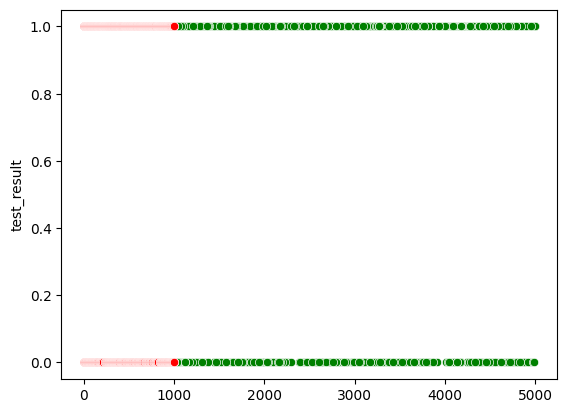

In [50]:
sns.scatterplot(y_test,color='Green')
sns.scatterplot(y_prediction,color='Red')

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [52]:
cm = confusion_matrix(y_test,y_prediction)

In [53]:
print(cm)

[[350  46]
 [ 36 568]]


In [54]:
accuracy = accuracy_score(y_test,y_prediction)

In [56]:
print(accuracy*100)

91.8
